<a href="https://colab.research.google.com/github/solobala/ABD26/blob/main/ABD26_Itog2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Загрузите в колаб файлы по оценкам (ratings) и фильмам (movies) и создайте на их основе pandas-датафреймы

### Импорт библиотек

In [5]:
import pandas as pd
import numpy as np 
from numpy.random import seed
import matplotlib.pyplot as plt
from matplotlib import pyplot
import os
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import scipy as sp
import scipy.stats as sst
from scipy.stats import shapiro
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

### Загрузка датасета

In [185]:
ratings=pd.read_csv('/content/ratings.csv',header=0, sep='\t', usecols=[0,1,2], names =['user_id', 'item_id', 'rating'])
ratings.head()

,user_id,item_id,rating
0,186,302,3
1,22,377,1
2,244,51,2
3,166,346,1
4,298,474,4


In [186]:
names =["movie id", "release date", "unknown", "Action", "Adventure", "Animation", "Children's", "Comedy", "Crime", 
        "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"]

In [187]:
movies=pd.read_csv('/content/movies.csv',header=0, sep='|', usecols = [0,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], names=names , parse_dates=[1], encoding='latin-1')
movies.head()

,movie id,release date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,2,1995-01-01,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3,1995-01-01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,4,1995-01-01,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,1995-01-01,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,6,1995-01-01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [188]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   movie id      1681 non-null   int64         
 1   release date  1680 non-null   datetime64[ns]
 2   unknown       1681 non-null   int64         
 3   Action        1681 non-null   int64         
 4   Adventure     1681 non-null   int64         
 5   Animation     1681 non-null   int64         
 6   Children's    1681 non-null   int64         
 7   Comedy        1681 non-null   int64         
 8   Crime         1681 non-null   int64         
 9   Documentary   1681 non-null   int64         
 10  Drama         1681 non-null   int64         
 11  Fantasy       1681 non-null   int64         
 12  Film-Noir     1681 non-null   int64         
 13  Horror        1681 non-null   int64         
 14  Musical       1681 non-null   int64         
 15  Mystery       1681 non-null   int64   

## 2. Средствами Pandas, используя dataframe ratings, найдите id пользователя, поставившего больше всего оценок

In [189]:
best_appreaizer = ratings.user_id.value_counts().head(1).index.values[0]

In [190]:
print(f'User_id пользователя, поставившего наибольшее число оценок: {best_appreaizer}') 

User_id пользователя, поставившего наибольшее число оценок: 405


##3. Оставьте в датафрейме ratings только те фильмы, который оценил данный пользователь 

In [191]:
df=ratings.loc[ratings['user_id']==best_appreaizer]

In [192]:
df.count()

user_id    737
item_id    737
rating     737
dtype: int64

##4. Добавьте к датафрейму из задания 3 столбцы:

Для построения модели нам нужны признаки. В качестве таковых будем использовать:
*  Год выхода
*   Жанры (Каждый столбец - это жанр. Единицу записываем, если фильм принадлежит данному жанру и 0 - если нет)
*   Общее количество оценок
*   Суммарную оценку


In [193]:
ratings_filtered=df.merge(movies, left_on='item_id', right_on='movie id', how='left') # Получим признаки жана и года выхода из датасета movies

In [194]:
ratings_filtered.drop(columns=['user_id','item_id'], axis=1, inplace=True) # удалим лишние колонки user_id и movie id

In [195]:
ratings_filtered.loc[:, 'release date'] = ratings_filtered.loc[:, 'release date'].dt.year

In [196]:
ratings_filtered.head()

,rating,movie id,release date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,4,56,1994,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,592,1995,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,1582,1947,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,171,1991,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,1,580,1995,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [197]:
ratings_merged=ratings_filtered.merge(ratings, left_on="movie id", right_on="item_id", how="left") # соединим с исходным ratings для получения оценок остальных пользователей по отобранным фильмам
ratings_merged.drop(columns=['user_id','item_id'], inplace=True)

In [198]:
ratings_merged

,rating_x,movie id,release date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating_y
0,4,56,1994,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4
1,4,56,1994,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
2,4,56,1994,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4
3,4,56,1994,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
4,4,56,1994,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52857,1,958,1994,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
52858,1,958,1994,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
52859,1,958,1994,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
52860,1,958,1994,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [199]:
data_agg=ratings_merged.groupby(by='movie id').agg(['count','sum'])['rating_y'].reset_index() # найдем кол-во и сумму оценок
ratings_filtered=ratings_filtered.merge(data_agg,how='inner') # добавим к-во и сумму в датасет
ratings_filtered.info() # проверяем на отсутствие пропусков

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737 entries, 0 to 736
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   rating        737 non-null    int64
 1   movie id      737 non-null    int64
 2   release date  737 non-null    int64
 3   unknown       737 non-null    int64
 4   Action        737 non-null    int64
 5   Adventure     737 non-null    int64
 6   Animation     737 non-null    int64
 7   Children's    737 non-null    int64
 8   Comedy        737 non-null    int64
 9   Crime         737 non-null    int64
 10  Documentary   737 non-null    int64
 11  Drama         737 non-null    int64
 12  Fantasy       737 non-null    int64
 13  Film-Noir     737 non-null    int64
 14  Horror        737 non-null    int64
 15  Musical       737 non-null    int64
 16  Mystery       737 non-null    int64
 17  Romance       737 non-null    int64
 18  Sci-Fi        737 non-null    int64
 19  Thriller      737 non-null   

In [288]:
ratings_filtered.head()

,rating,movie id,release date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,count,sum
0,4,56,1994,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,394,1600
1,1,592,1995,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,9,30
2,1,1582,1947,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,1,171,1991,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,65,252
4,1,580,1995,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,32,108


##5. Сформируйте X_train, X_test, y_train, y_test

В модели будем предсказывать rating. У нас значения признаков release_date (год), count (Количество оценок) и sum (суммарная оценка) отличаются от значения признаков в полях жанров на 3-4 порядка, поэтому выполним предобработку факторов (логарифмирование или нормализацию)

In [300]:
X, y=ratings_filtered[[ "release date", "unknown", "Action", "Adventure", "Animation", "Children's", "Comedy", "Crime", 
        "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western","count","sum"]].copy(), ratings_filtered['rating'].copy()

In [290]:
# y =  np.log1p(y)
# for col in X.columns:
#     if np.abs(X[col].skew()) > 0.3:
#         X[col] = np.log1p(X[col])

In [304]:
min_rating = min(ratings_filtered["rating"])
max_rating = max(ratings_filtered["rating"])
min_count = min(ratings_filtered["count"])
max_count = max(ratings_filtered["count"])
min_sum = min(ratings_filtered["sum"])
max_sum = max(ratings_filtered["sum"])
min_year = min(ratings_filtered["release date"])
max_year = max(ratings_filtered["release date"])

In [305]:
y = ratings_filtered["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values


In [306]:
X=ratings_filtered[[ "release date", "unknown", "Action", "Adventure", "Animation", "Children's", "Comedy", "Crime", 
        "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western","count","sum"]].copy()
X.loc[:,"count"] = ratings_filtered["count"].apply(lambda x: (x - min_count) / (max_count - min_count)).values  
X.loc[:,"sum"] = ratings_filtered["sum"].apply(lambda x: (x - min_sum) / (max_sum - min_sum)).values   
X.loc[:,"release date"] = ratings_filtered["release date"].apply(lambda x: (x - min_year) / (max_year - min_year)).values       

In [307]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

##6. Возьмите модель линейной регрессии (или любую другую для задачи регрессии)  и обучите ее на фильмах

In [308]:
model = LinearRegression()


In [309]:
model.fit(X_train, y_train)

LinearRegression()

##7. Оцените качество модели на X_test, y_test при помощи метрик для задачи регрессии

In [310]:
y_pred = model.predict(X_test)
y_pred

array([ 1.36891120e-01,  1.84590690e-02,  5.49653238e-02,  4.18866705e-02,
        1.39233404e-01,  2.30811875e-01,  1.11722190e-01,  5.17568415e-01,
        2.72083416e-01,  9.82015380e-02,  6.21671534e-02,  1.99546004e-02,
        9.96256764e-02,  6.89700995e-01,  4.38569007e-01,  2.16202310e-01,
        1.79546649e-01,  2.64844355e-02,  5.08160664e-01,  2.29886601e-01,
        4.79797464e-01,  2.37042103e-02,  9.56743453e-02,  4.39698564e-01,
        1.15650349e-01,  6.57775510e-02,  2.62094574e-02,  4.64188622e-01,
        6.24306222e-01,  5.48726906e-02,  1.02245767e-01,  2.84608517e-02,
        4.00936142e-01,  5.98480980e-02,  3.71735701e-01,  7.17787656e-02,
        2.13807248e-02,  2.35577842e-01,  3.51566167e-01,  7.82813957e-02,
       -9.04214233e-02, -4.07365990e-02,  1.06876608e-01, -8.14341873e-02,
        5.87099068e-01,  2.47316365e-01,  1.87011847e-01,  1.45580121e-01,
        2.86729582e-01,  1.77580865e-01,  1.44739235e-01,  7.78496620e-02,
       -4.25635304e-03,  

In [311]:
print (f' Коэффициент детерминации: {model.score(X_test, y_test)}') 

 Коэффициент детерминации: 0.387774861281884


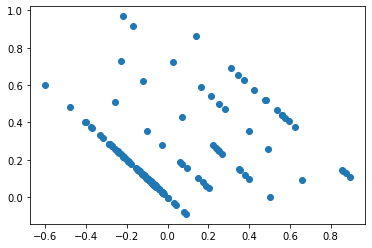

In [312]:
residuals = y_test-y_pred
plt.scatter(residuals,y_pred)
plt.show()

In [313]:
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from numpy.random import seed

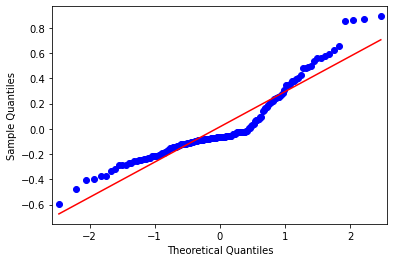

In [314]:
seed(1)
qqplot(residuals, line='s')
plt.show()

In [315]:
mean_squared_error(y_test, y_pred)

0.07825407834760982

##8.Загрузить данные в spark

In [1]:
!apt-get update > /dev/null

In [2]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [3]:
!wget -q https://dlcdn.apache.org/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz

In [4]:
!tar -xf spark-3.3.1-bin-hadoop3.tgz

In [6]:
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.1-bin-hadoop3"

In [7]:
!pip install -q findspark
import findspark

In [8]:
findspark.init()
from pyspark.sql import SparkSession

In [9]:
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext

In [19]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, DateType
from pyspark.sql.functions import asc, desc, col
from pyspark.sql import functions as F

In [11]:
schema = StructType(fields=[
    StructField("user_id", IntegerType()),
    StructField("item_id", IntegerType()),
    StructField("rating", IntegerType()),
    StructField("timestamp", StringType ()),
])

In [12]:
df_rt = spark.read.csv('/content/ratings.csv', schema=schema, header=False, sep='\t')

In [13]:
df_rt.take(5)

[Row(user_id=196, item_id=242, rating=3, timestamp='881250949'),
 Row(user_id=186, item_id=302, rating=3, timestamp='891717742'),
 Row(user_id=22, item_id=377, rating=1, timestamp='878887116'),
 Row(user_id=244, item_id=51, rating=2, timestamp='880606923'),
 Row(user_id=166, item_id=346, rating=1, timestamp='886397596')]

In [14]:
movie_schema = StructType(fields=[
    StructField("movie id", IntegerType()),
     StructField("movie_name", StringType()),
    StructField("release date", StringType()),
    StructField("video_release date", StringType()),
      StructField("IMDb URL", StringType()),
     StructField("unknown", IntegerType()),
    StructField("Action",  IntegerType()),
    StructField("Adventure", IntegerType()),
    StructField("Animation", IntegerType()),
    StructField("Children's", IntegerType()),
    StructField("Comedy", IntegerType()),
    StructField("Crime", IntegerType()),
    StructField("Documentary", IntegerType()),
    StructField("Drama", IntegerType()),
    StructField("Fantasy", IntegerType()),
    StructField("Film-Noir", IntegerType()),
     StructField("Horror", IntegerType()),
    StructField("Mystery", IntegerType()),
     StructField("Romance", IntegerType()),
    StructField("Sci-Fi", IntegerType()),
     StructField("Thriller", IntegerType()),
    StructField("War", IntegerType()),
    StructField("Western", IntegerType())

])

In [15]:
df_mv = spark.read.csv('/content/movies.csv', schema=movie_schema, header=False, sep='|',)

In [16]:
df_mv.take(5)

[Row(movie id=1, movie_name='Toy Story (1995)', release date='01-Jan-1995', video_release date=None, IMDb URL='http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)', unknown=0, Action=0, Adventure=0, Animation=1, Children's=1, Comedy=1, Crime=0, Documentary=0, Drama=0, Fantasy=0, Film-Noir=0, Horror=0, Mystery=0, Romance=0, Sci-Fi=0, Thriller=0, War=0, Western=0),
 Row(movie id=2, movie_name='GoldenEye (1995)', release date='01-Jan-1995', video_release date=None, IMDb URL='http://us.imdb.com/M/title-exact?GoldenEye%20(1995)', unknown=0, Action=1, Adventure=1, Animation=0, Children's=0, Comedy=0, Crime=0, Documentary=0, Drama=0, Fantasy=0, Film-Noir=0, Horror=0, Mystery=0, Romance=0, Sci-Fi=0, Thriller=0, War=1, Western=0),
 Row(movie id=3, movie_name='Four Rooms (1995)', release date='01-Jan-1995', video_release date=None, IMDb URL='http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995)', unknown=0, Action=0, Adventure=0, Animation=0, Children's=0, Comedy=0, Crime=0, Documentary=0, Dr

##9. Средствами спарка вывести среднюю оценку для каждого фильма

In [17]:
rating_avg=df_rt.groupBy('item_id').avg('rating')

In [18]:
rating_avg.show()

+-------+------------------+
|item_id|       avg(rating)|
+-------+------------------+
|    496| 4.121212121212121|
|    471|3.6108597285067874|
|    463| 3.859154929577465|
|    148|          3.203125|
|   1342|               2.5|
|    833| 3.204081632653061|
|   1088| 2.230769230769231|
|   1591|3.1666666666666665|
|   1238|             3.125|
|   1580|               1.0|
|   1645|               4.0|
|    392|3.5441176470588234|
|    623| 2.923076923076923|
|    540| 2.511627906976744|
|    858|               1.0|
|    737| 2.983050847457627|
|    243|2.4393939393939394|
|   1025|2.9318181818181817|
|   1084| 3.857142857142857|
|   1127| 2.909090909090909|
+-------+------------------+
only showing top 20 rows



## 10. Посчитайте средствами спарка среднюю оценку для каждого жанра

In [36]:
action_avg=df_rt.join(df_mv, df_rt.item_id==df_mv['movie id'],how='right').select('rating','Action').where((df_mv['Action']==1)).groupBy('Action').agg(F.avg(df_rt.rating).alias('avg'))
action_avg.show()

+------+-----------------+
|Action|              avg|
+------+-----------------+
|     1|3.480245417953027|
+------+-----------------+



In [37]:
adventure_avg=df_rt.join(df_mv, df_rt.item_id==df_mv['movie id'],how='right').select('rating','Adventure').where((df_mv['Adventure']==1)).groupBy('Adventure').agg(F.avg(df_rt.rating).alias('avg'))
adventure_avg.show()

+---------+-----------------+
|Adventure|              avg|
+---------+-----------------+
|        1|3.503526503308369|
+---------+-----------------+



In [38]:
animation_avg=df_rt.join(df_mv, df_rt.item_id==df_mv['movie id'],how='right').select('rating','Animation').where((df_mv['Animation']==1)).groupBy('Animation').agg(F.avg(df_rt.rating).alias('avg'))
animation_avg.show()

+---------+------------------+
|Animation|               avg|
+---------+------------------+
|        1|3.5766990291262135|
+---------+------------------+



In [39]:
children_avg=df_rt.join(df_mv, df_rt.item_id==df_mv['movie id'],how='right').select('rating',"Children's").where((df_mv["Children's"]==1)).groupBy("Children's").agg(F.avg(df_rt.rating).alias('avg'))
children_avg.show()

+----------+------------------+
|Children's|               avg|
+----------+------------------+
|         1|3.3532442216652742|
+----------+------------------+



In [40]:
comedy_avg=df_rt.join(df_mv, df_rt.item_id==df_mv['movie id'],how='right').select('rating',"Comedy").where((df_mv["Comedy"]==1)).groupBy("Comedy").agg(F.avg(df_rt.rating).alias('avg'))
comedy_avg.show()

+------+------------------+
|Comedy|               avg|
+------+------------------+
|     1|3.3940734781442745|
+------+------------------+



In [41]:
crime_avg=df_rt.join(df_mv, df_rt.item_id==df_mv['movie id'],how='right').select('rating',"Crime").where((df_mv["Crime"]==1)).groupBy("Crime").agg(F.avg(df_rt.rating).alias('avg'))
crime_avg.show()

+-----+------------------+
|Crime|               avg|
+-----+------------------+
|    1|3.6322780881440098|
+-----+------------------+



In [42]:
documentary_avg=df_rt.join(df_mv, df_rt.item_id==df_mv['movie id'],how='right').select('rating',"Documentary").where((df_mv["Documentary"]==1)).groupBy("Documentary").agg(F.avg(df_rt.rating).alias('avg'))
documentary_avg.show()

+-----------+------------------+
|Documentary|               avg|
+-----------+------------------+
|          1|3.6728232189973613|
+-----------+------------------+



In [43]:
drama_avg=df_rt.join(df_mv, df_rt.item_id==df_mv['movie id'],how='right').select('rating',"Drama").where((df_mv["Drama"]==1)).groupBy("Drama").agg(F.avg(df_rt.rating).alias('avg'))
drama_avg.show()

+-----+------------------+
|Drama|               avg|
+-----+------------------+
|    1|3.6873793708484772|
+-----+------------------+



In [44]:
fantasy_avg=df_rt.join(df_mv, df_rt.item_id==df_mv['movie id'],how='right').select('rating',"Fantasy").where((df_mv["Fantasy"]==1)).groupBy("Fantasy").agg(F.avg(df_rt.rating).alias('avg'))
fantasy_avg.show()

+-------+------------------+
|Fantasy|               avg|
+-------+------------------+
|      1|3.2152366863905324|
+-------+------------------+



In [46]:
film_noir_avg=df_rt.join(df_mv, df_rt.item_id==df_mv['movie id'],how='right').select('rating',"Film-Noir").where((df_mv["Film-Noir"]==1)).groupBy("Film-Noir").agg(F.avg(df_rt.rating).alias('avg'))
film_noir_avg.show()

+---------+------------------+
|Film-Noir|               avg|
+---------+------------------+
|        1|3.9215233698788228|
+---------+------------------+



In [47]:
horror_avg=df_rt.join(df_mv, df_rt.item_id==df_mv['movie id'],how='right').select('rating',"Horror").where((df_mv["Horror"]==1)).groupBy("Horror").agg(F.avg(df_rt.rating).alias('avg'))
horror_avg.show()

+------+------------------+
|Horror|               avg|
+------+------------------+
|     1|3.2903893172841827|
+------+------------------+



In [48]:
mystery_avg=df_rt.join(df_mv, df_rt.item_id==df_mv['movie id'],how='right').select('rating',"Mystery").where((df_mv["Mystery"]==1)).groupBy("Mystery").agg(F.avg(df_rt.rating).alias('avg'))
mystery_avg.show()

+-------+-----------------+
|Mystery|              avg|
+-------+-----------------+
|      1|3.521396851029471|
+-------+-----------------+



In [49]:
romance_avg=df_rt.join(df_mv, df_rt.item_id==df_mv['movie id'],how='right').select('rating',"Romance").where((df_mv["Romance"]==1)).groupBy("Romance").agg(F.avg(df_rt.rating).alias('avg'))
romance_avg.show()

+-------+----------------+
|Romance|             avg|
+-------+----------------+
|      1|3.63813155386082|
+-------+----------------+



In [50]:
sci_fi_avg=df_rt.join(df_mv, df_rt.item_id==df_mv['movie id'],how='right').select('rating',"Sci-Fi").where((df_mv["Sci-Fi"]==1)).groupBy("Sci-Fi").agg(F.avg(df_rt.rating).alias('avg'))
sci_fi_avg.show()

+------+-----------------+
|Sci-Fi|              avg|
+------+-----------------+
|     1|3.621704948358255|
+------+-----------------+



In [51]:
thriller_avg=df_rt.join(df_mv, df_rt.item_id==df_mv['movie id'],how='right').select('rating',"Thriller").where((df_mv["Thriller"]==1)).groupBy("Thriller").agg(F.avg(df_rt.rating).alias('avg'))
thriller_avg.show()

+--------+------------------+
|Thriller|               avg|
+--------+------------------+
|       1|3.5607227022780834|
+--------+------------------+



In [52]:
war_avg=df_rt.join(df_mv, df_rt.item_id==df_mv['movie id'],how='right').select('rating',"War").where((df_mv["War"]==1)).groupBy("War").agg(F.avg(df_rt.rating).alias('avg'))
war_avg.show()

+---+------------------+
|War|               avg|
+---+------------------+
|  1|3.5090069495245064|
+---+------------------+



In [53]:
western_avg=df_rt.join(df_mv, df_rt.item_id==df_mv['movie id'],how='right').select('rating',"Western").where((df_mv["Western"]==1)).groupBy("Western").agg(F.avg(df_rt.rating).alias('avg'))
western_avg.show()

+-------+-----------------+
|Western|              avg|
+-------+-----------------+
|      1|3.815811874866993|
+-------+-----------------+



##11. В спарке получить 2 датафрейма с 5-ю самыми популярными и самыми непопулярными фильмами (по количеству оценок, либо по самой оценке - на Ваш выбор)

In [64]:
rating_max = df_rt.groupBy('item_id').agg(F.avg(df_rt.rating).alias('avg')).orderBy(col('avg').desc()).show(5)

+-------+---+
|item_id|avg|
+-------+---+
|   1599|5.0|
|   1467|5.0|
|   1500|5.0|
|   1653|5.0|
|   1122|5.0|
+-------+---+
only showing top 5 rows



In [65]:
rating_min = df_rt.groupBy('item_id').agg(F.avg(df_rt.rating).alias('avg')).orderBy(col('avg').asc()).show(5)

+-------+---+
|item_id|avg|
+-------+---+
|   1339|1.0|
|   1561|1.0|
|   1618|1.0|
|   1352|1.0|
|    858|1.0|
+-------+---+
only showing top 5 rows



In [66]:
rating_max1 = df_rt.groupBy('item_id').agg(F.count(df_rt.rating).alias('cnt')).orderBy(col('cnt').desc()).show(5)

+-------+---+
|item_id|cnt|
+-------+---+
|     50|583|
|    258|509|
|    100|508|
|    181|507|
|    294|485|
+-------+---+
only showing top 5 rows



In [67]:
rating_min1 = df_rt.groupBy('item_id').agg(F.count(df_rt.rating).alias('cnt')).orderBy(col('cnt').asc()).show(5)

+-------+---+
|item_id|cnt|
+-------+---+
|   1460|  1|
|   1618|  1|
|   1339|  1|
|   1645|  1|
|   1650|  1|
+-------+---+
only showing top 5 rows

